# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-5.1.-Fitting-a-regression-line-to-the-student-debt-data" data-toc-modified-id="Exercise-5.1.-Fitting-a-regression-line-to-the-student-debt-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 5.1. Fitting a regression line to the student debt data</a></div><div class="lev1 toc-item"><a href="#Exercise-5.2.-Kleiber’s-law-and-linear-regression" data-toc-modified-id="Exercise-5.2.-Kleiber’s-law-and-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 5.2. Kleiber’s law and linear regression</a></div><div class="lev1 toc-item"><a href="#Exercise-5.3.-The-Least-Squares-cost-function-and-a-single-Newton-step" data-toc-modified-id="Exercise-5.3.-The-Least-Squares-cost-function-and-a-single-Newton-step-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 5.3. The Least Squares cost function and a single Newton step</a></div><div class="lev1 toc-item"><a href="#Exercise-5.6.-Compare-the-Least-Squares-and-Least-Absolute-Deviation-costs" data-toc-modified-id="Exercise-5.6.-Compare-the-Least-Squares-and-Least-Absolute-Deviation-costs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 5.6. Compare the Least Squares and Least Absolute Deviation costs</a></div><div class="lev1 toc-item"><a href="#Exercise-5.7.-Empirically-confirm-convexity-for-a-toy-dataset" data-toc-modified-id="Exercise-5.7.-Empirically-confirm-convexity-for-a-toy-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 5.7. Empirically confirm convexity for a toy dataset</a></div><div class="lev1 toc-item"><a href="#Exercise-5.9.-Housing-price-and-Automobile-Miles-per-Gallon-prediction" data-toc-modified-id="Exercise-5.9.-Housing-price-and-Automobile-Miles-per-Gallon-prediction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 5.9. Housing price and Automobile Miles-per-Gallon prediction</a></div><div class="lev1 toc-item"><a href="#Exercise-5.11.-Multi-output-regression" data-toc-modified-id="Exercise-5.11.-Multi-output-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 5.11. Multi-output regression</a></div>

In [303]:
# import autograd-wrapped numpy
import autograd.numpy as np
import jax.numpy as jnp

# datapath to data
datapath = '../mlrefined_datasets/superlearn_datasets/'

In [304]:
ar = jnp.array([[2, 3 ,5], [4, 3, 5]])
jnp.square(jnp.stack(ar))


Array([[ 4,  9, 25],
       [16,  9, 25]], dtype=int32)

# Exercise 5.1. Fitting a regression line to the student debt data

In [305]:
# import the dataset
csvname = datapath + 'student_debt_data.csv'
data = np.loadtxt(csvname,delimiter=',')
import numpy as np
from sklearn.linear_model import LinearRegression

# extract input - for this dataset, these are times
x = data[:,0]

# extract output - for this dataset, these are total student debt
y = data[:,1]





def normal_RMS_solve(X, y):
    y = jnp.array(y)
    X = jnp.array(list(map(lambda elem: jnp.insert(jnp.array(elem), 0, 1.0), X)))
    A = X.T @ X
    b = X.T @ y
    w = jnp.linalg.lstsq(A, b, rcond=None)[0]
    return w


w = normal_RMS_solve(x, y)
print(w)
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
# Получаем значения весов
w0 = model.intercept_
w1 = model.coef_[0]
predict = lambda x, w: w[0] + w[1]*x
print(predict(2030, [w0, w1]))


# Ваши данны

# Добавляем столбец из единиц для учета свободного члена в модели
X = np.column_stack((np.ones(len(x)), x))

# Решаем нормальные уравнения
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Получаем значения весов


 

[1.6179041e-07 3.2505789e-04]
2.3295222147299057


# Exercise 5.2. Kleiber’s law and linear regression

6.814734774379877 0.65281209761767


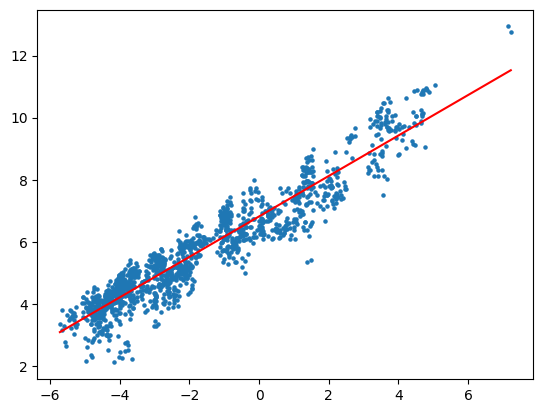

980.02606
8.31789


In [306]:
# import the dataset
import matplotlib.pyplot as plt


csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]



X = np.log(x[0])
Y = np.log(y[0])

model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
w0 = model.intercept_
w1 = model.coef_[0]
print(w0, w1)
w = np.array([w0, w1])

# Массив значений x для построения линии
x_line = np.linspace(np.min(X), np.max(X), 100)
lin = lambda w, x: w[0] + w[1]*x  
# Вычисление значений y с использованием модели
y_line = lin(w, x_line)
dep_y = lambda x, w0, w1: jnp.exp(w0)*x**w1
 

plt.plot(x_line, y_line, color='red')
plt.scatter(X, Y, s=5)
plt.show()
print(dep_y(10, w0, w1) / 4.18)
print(lin(w, jnp.log(10)))


# Exercise 5.3. The Least Squares cost function and a single Newton step

1.0164276683602245 -0.9676708574788261 -1.0003908360821718
[[ 1.01642767]
 [-0.96767086]
 [-1.00039084]]
0.010895817940977 1.207013193750418


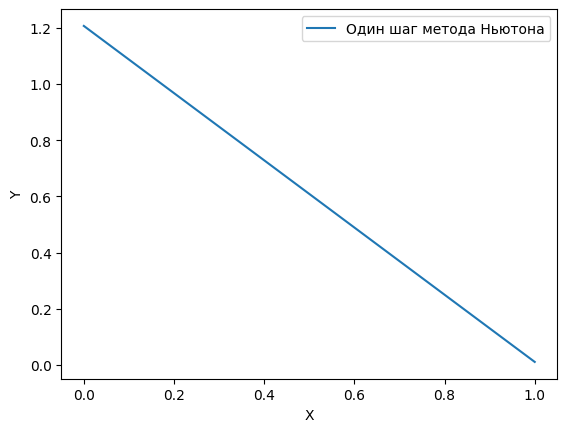

In [307]:
# load in data
csvname = datapath + '3d_linregress_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:] 

X = np.column_stack((np.ones(len(x.T)), x.T))
w = np.linalg.inv(X.T @ X) @ X.T @ y.T
model = LinearRegression()


# Обучение модели на данных
model.fit(x.T, y[0].T)
w0 = model.intercept_
w1 = model.coef_[0]
w2 = model.coef_[1]
print(w0, w1, w2)
print(w)
# Получение предсказанных значений
y_pred = model.predict(x.T)
y_pr0 = np.random.uniform(-1, 1, size=3)
mse0 = np.mean((np.dot(X, y_pr0) - y[0])**2)
mse = np.mean((y_pred - y[0]) ** 2)
print(mse, mse0)
plt.plot(np.array([0, 1]), np.array([mse0, mse]), label="Один шаг метода Ньютона")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# Визуализация данных и предсказанных значений


# Exercise 5.6. Compare the Least Squares and Least Absolute Deviation costs

In [308]:
# load in dataset
from jax import grad
import jax.numpy as jnp
import matplotlib.pyplot as plt 

def Adam(fun, d, w0, iter, b1, b2, loss=False, decreased=False):
    '''
    Adaptive Moment estimation - ADAM
    '''
    gradient = grad(fun)
    w0 = jnp.array(w0)
    w_history = [w0]
    fun_history = [float(fun(w0))]
    w = w0
    for i in range(iter):
        grad_eval = gradient(w)
        if i > 0:
            ds = b1*ds - (1 - b1)*grad_eval
            h = b2*h + (1 - b2)*jnp.square(grad_eval)
        else:
            ds = -grad_eval
            h = jnp.square(grad_eval)
        
        diff = d*ds/jnp.sqrt(h)
        if decreased:
            diff = diff*(1 / (i + 1))
        w = w + diff
        f = fun(w)
        f = float(f)
        w_history.append(w)
        fun_history.append(f)

    def build_history_of_loss(i, fun_list):
        k = np.linspace(0, i, i+1)
        fun_arr = np.array(fun_list)
        plt.plot(k, fun_arr)
        plt.xlabel('k')
        plt.ylabel('g(k)')
        plt.title('График истории функции потерь')
        plt.text(0.5, 0.9, 'Метод: Adam', ha='center', va='center', transform=plt.gca().transAxes)
        plt.grid(True)
        plt.show()

    if loss:
        build_history_of_loss(iter, fun_history)

    return {"min": (w, f), "weights_history": w_history, "cost_history": fun_history, "iters": iter}



data = np.loadtxt(datapath + 'regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]




#test1x = jnp.array([[1.0, 2.0], [1.0, 5.0]])
#test1y = jnp.array([3.0, 5.0])
#w = jnp.array([4.0, 5.0])


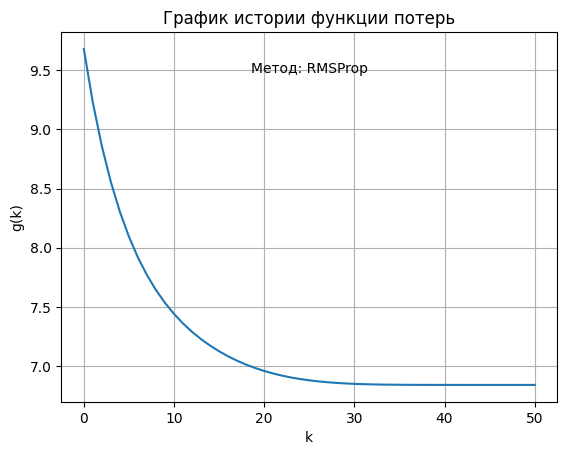

[0.5943151 2.761049 ]
{'MSE': 6.84139347076416, 'RMSE': 2.6156058311462402, 'MAD': 1.6893020868301392}
[-0.9206669  1.066227 ]
0.5944783905298883 2.7611428842297485
[-0.95494232] 1.007083891001387


In [312]:
class LinearReg:

    def __init__(self, X, Y, w0):
        self.X = np.column_stack((np.ones(len(X.T)), X.T))
        self.Y = Y
        self.w0 = jnp.array(w0)
        self.w, self.w_history, self.method = None, None, None

    
    def linear_model(self, x, w):
        return jnp.dot(x, w.T)

    def RMS(self, w):
        return jnp.mean((self.linear_model(jnp.stack(self.X), w) - self.Y)**2)
        
    def MAD(self, w):
        return jnp.mean(abs(self.linear_model(jnp.stack(self.X), w) - self.Y))

    @staticmethod
    def build_history_of_loss(i, fun_list, method_name):
            k = np.linspace(0, i, i+1)
            fun_arr = np.array(fun_list)
            plt.plot(k, fun_arr)
            plt.xlabel('k')
            plt.ylabel('g(k)')
            plt.title('График истории функции потерь')
            plt.text(0.5, 0.9, f'Метод: {method_name}', ha='center', va='center', transform=plt.gca().transAxes)
            plt.grid(True)
            plt.show()
    
    
    def Adam(self, fun, d, iter, b1, b2, loss=False, decreased=False):
        '''
        Adaptive Moment estimation - ADAM
        '''
        
        if fun == "RMS":
            self.method, fun = self.RMS, self.RMS
        elif fun == "MAD":
            self.method, fun = self.MAD, self.MAD
        else:
            raise TypeError("Invalid loss function specified")

        
        gradient = grad(fun)
        w0 = jnp.array(self.w0)
        w_history = [w0]
        fun_history = [float(fun(w0))]
        w = w0
        for i in range(iter):
            grad_eval = gradient(w)
            if i > 0:
                ds = b1*ds - (1 - b1)*grad_eval
                h = b2*h + (1 - b2)*jnp.square(grad_eval)
            else:
                ds = -grad_eval
                h = jnp.square(grad_eval)
            
            diff = d*ds/jnp.sqrt(h)
            if decreased:
                diff = diff*(1 / (i + 1))
            w = w + diff
            f = fun(w)
            f = float(f)
            w_history.append(w)
            fun_history.append(f)

        self.w = w
        self.w_history = w_history
    
        if loss:
            LinearReg.build_history_of_loss(iter, fun_history, "Adam")
    
        return {"min": (w, f), "weights_history": w_history, "cost_history": fun_history, "iters": iter}

    
    def RMSProp(self, d, iter, gamma, loss=False, decreased=False):
        """
        Root Mean Squared Error Propogation - RMSProp
        
        """
        self.method, fun = self.RMS, self.RMS
        gradient = grad(fun)
        w0 = jnp.array(self.w0)
        w_history = [w0]
        fun_history = [float(fun(w0))]
        w = w0
        for i in range(iter):
            grad_eval = gradient(w)
            if i > 0:
                h = gamma*h + (1 - gamma)*jnp.square(grad_eval)
            else:
                h = jnp.square(grad_eval)
            
            diff = d*grad_eval/jnp.sqrt(h)
            if decreased:
                diff = diff*(1 / (i + 1))
            w = w - diff
            f = fun(w)
            f = float(f)
            w_history.append(w)
            fun_history.append(f)

        self.w = w
        self.w_history = w_history
    
        if loss:
            LinearReg.build_history_of_loss(iter, fun_history, "RMSProp")
    
        return {"min": (w, f), "weights_history": w_history, "cost_history": fun_history, "iters": iter}

    def gradient_descent(self, fun, d, iter, loss=False, decreased=False, contour=False):
        """
        classic gradient descent
        """

        if fun == "RMS":
            self.method, fun = self.RMS, self.RMS
        elif fun == "MAD":
            self.method, fun = self.MAD, self.MAD
        else:
            raise TypeError("Invalid loss function specified")
        
        gradient = grad(fun)
        w0 = jnp.array(self.w0)
        w_history = [w0]
        fun_history = [float(fun(w0))]
        w = w0
        for i in range(iter):
            grad_eval = gradient(w)
            diff = d*grad_eval
            if decreased:
                diff = diff*(1 / (i + 1))
            w = w - diff
            f = fun(w)
            f = float(f)
            w_history.append(w)
            fun_history.append(f)

        self.w = w
        self.w_history = w_history
    
    
        def build_contour_graph(w_history, f):
            # Вычисление значений функции на сетке
            x = np.linspace(-10, 10, 100)
            y = np.linspace(-10, 10, 100)
            a, b = np.meshgrid(x, y)
            Z = np.zeros_like(a)
    
            for i in range(len(a)):
                for j in range(len(b)):
                    Z[i, j] = f([a[i, j], b[i, j]])
            
            # Построение контурного графика
            plt.figure()
            plt.contour(x, y, Z, levels=20)
            plt.plot([w[0] for w in w_history], [w[1] for w in w_history], '-o')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('Contour plot')
            plt.show()
    
        if loss:
            LinearReg.build_history_of_loss(iter, fun_history, "classic_grad_desc")
    
        if contour:
           build_contour_graph(w_history, fun) 
    
        return {"min": (w, f), "weights_history": w_history, "cost_history": fun_history, "iters": iter}

    def normal_eq(self):
        self.w = jnp.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.Y
        self.w_history = [self.w0, self.w]
        self.method = self.RMS
        return self.w

    
    def predict(self, x):
        x = jnp.array(x)
        x = jnp.insert(x, 0, 1)
        weight = self.w0 if self.w is None else self.w
        return self.linear_model(x, weight)

    @property
    def metrics(self):
        weight = self.w0 if self.w is None else self.w
        return {"MSE": float(self.RMS(weight)), 
                "RMSE": float(jnp.sqrt(self.RMS(weight))), 
                "MAD": float(self.MAD(weight))}
    
    def _build_method_history(self):
        g = jnp.array(list(map(self.method, self.w_history)))
        plt.plot(jnp.array(self.w_history), g)
        plt.xlabel("w")
        plt.ylabel('g(w)')
        plt.title(f'История метода {self.method.__name__}')
        plt.show()
        
        
        
        
        
              
        

    

ex = LinearReg(x, y, [-1.0, 3.0])
ex.RMSProp(0.1, 50, 0.9, loss=True)
print(ex.w)
print(ex.metrics)
ex.Adam("MAD", 0.1, 150, 0.9, 0.99)
print(ex.w)

model = LinearRegression()
model.fit(x.reshape(-1, 1), y[0])
w0 = model.intercept_
w1 = model.coef_[0]
print(w0, w1)

from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss='epsilon_insensitive')

model.fit(x.reshape(-1, 1), y[0])  

w0 = model.intercept_
w1 = model.coef_[0]

print(w0, w1)



    

# Exercise 5.7. Empirically confirm convexity for a toy dataset

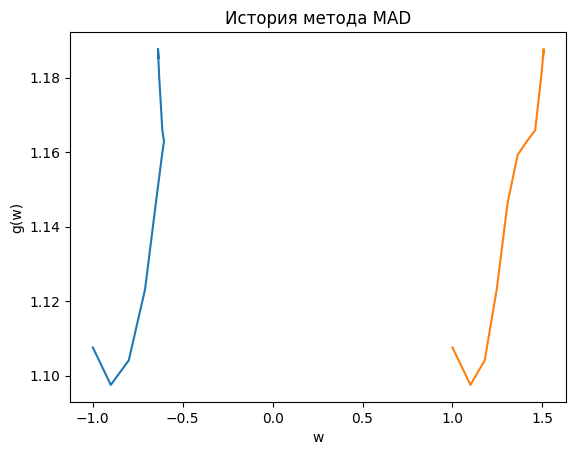

In [313]:
# load in dataset
data = np.loadtxt(datapath + 'regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

ex = LinearReg(x, y, [-1.0, 1.0])
ex.Adam("MAD", 0.1, 10, 0.9, 0.99)
ex._build_method_history()

# Exercise 5.9. Housing price and Automobile Miles-per-Gallon prediction

In [314]:
# import the dataset
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]


mean = np.mean(x, axis=1)
s = np.zeros(np.size(x.T[0]))
for vec in x.T:
    s += (vec - mean)**2

RMS = np.sqrt(s / np.size(x[0]))
x_norm = np.array(list(map(lambda vec: (vec - mean) / RMS, x.T)))
model = LinearReg(x_norm.T, y[0], np.ones(np.size(x[0])))
model.normal_eq()
model.metrics
#RMSE сошлось и MAD погрешность около 5%


{'MSE': 21.897781372070312,
 'RMSE': 4.679506301879883,
 'MAD': 3.272944927215576}

In [315]:
# import the dataset
csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]


mean = np.mean(x, axis=1)
print(mean)
s = np.zeros(np.size(x.T[0]))
for vec in x.T:
    s += (vec - mean)**2

RMS = np.sqrt(s / np.size(x[0]))
x_norm = np.array(list(map(lambda vec: (vec - mean) / RMS, x.T)))
model = LinearReg(x_norm.T, y[0], np.ones(np.size(x[0])))
model.normal_eq()

#??? сори, но 10 часов это слишком. В целом я уяснил как, что делать даже класс написал.

[5.45477387e+00 1.93425879e+02            nan 2.97042462e+03
 1.55680905e+01 7.60100503e+01 1.57286432e+00]


Array([nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

# Exercise 5.11. Multi-output regression

In [316]:
# load in data
csvname = datapath + 'linear_2output_regression.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

print(x[0])
print(y)


multi_model = LinearRegression()

multi_model.fit(x, y) 
y_pred = multi_model.predict(x)

[0.22028232 0.43186003 0.76326171 0.89421097 0.85580873 0.86949619
 0.458462   0.63831211 0.71150273 0.60910396 0.08173835 0.44012626
 0.01835995 0.18454017 0.7348377  0.81896629 0.40912446 0.13154163
 0.89302141 0.71359459 0.77223247 0.71092033 0.22538329 0.44095863
 0.48745944 0.38606545 0.13239592 0.76653621 0.47667137 0.85198143
 0.23635618 0.84574455 0.11777645 0.26972079 0.25921369 0.67519933
 0.52018798 0.402063   0.71012858 0.88364998 0.02370258 0.36821686
 0.5650069  0.36369366 0.55554385 0.93705286 0.56744948 0.68980123
 0.35945096 0.61786939 0.31058597 0.31729265 0.931659   0.52600513
 0.85221498 0.61392972 0.67066318 0.26374553 0.96913484 0.41811704
 0.35150469 0.29207765 0.1217274  0.71170154 0.98280302 0.69257128
 0.61717799 0.08517123 0.38026222 0.07530684 0.41645281 0.52792067
 0.1888261  0.78029685 0.10904357 0.8318835  0.12179285 0.86484279
 0.37784885 0.83105896 0.56882683 0.61516379 0.46975786 0.68864084
 0.85125894 0.70393768 0.60666227 0.62178521 0.2462186  0.5298